<div style="display: flex; align-items: flex-start;">
    <a href='https://www.kaggle.com/competitions/titanic' target='_blank'>
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1200px-RMS_Titanic_3.jpg" alt="Classic House" style="border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);" width="600" height="500">
    </a>
    <div style="margin-left: 20px;">
        <p style="color: #B22222; font-size: 16px;"><strong>Project Objective:</strong> The objective of this project is to develop a machine learning model that can predict which passengers survived the Titanic disaster. The goal is to use demographic and socio-economic characteristics of the passengers to determine their likelihood of survival.</p>

Exploratory Data Analysis (EDA): Examined missing values, distributions, and correlations within the dataset.

Data Cleaning: Addressed missing values by imputing or removing them as appropriate, particularly focusing on critical data such as age and cabin information.

Feature Engineering: Transformed existing variables and created new features (e.g., family size) to enhance model performance.

Feature Selection: Identified the most influential features to improve model accuracy.

Modeling: Developed models using various classification algorithms including logistic regression, decision trees, random forests, and support vector machines.

Model Evaluation: Evaluated models using metrics such as accuracy, precision, and F1 score to select the best-performing model.

Hyperparameter Optimization: Improved model performance through techniques like Grid Search and Random Search to optimize hyperparameters.
<p style="color: green; text-align: center; margin-top: 20px;">
    Click on the image to access the data files and the project's Kaggle page.
</p>


<p style="text-align: center;"><em>EDA</em></p>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
train =pd.read_csv("ttrain.csv")
test1 =pd.read_csv("ttest.csv")

In [3]:
train.shape

(891, 12)

In [4]:
df =pd.concat([train, test1])
print(train.shape)
print('_' * 40)
print(test1.shape)
print('_' * 40)
print(df.shape)
print('_' * 40)
print(train.isnull().sum())
print('_' * 40)
print(test1.isnull().sum())


(891, 12)
________________________________________
(418, 11)
________________________________________
(1309, 12)
________________________________________
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
df.duplicated().sum()

0

In [6]:
df.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0.0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
24,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
228,1120,NaN,3,"Everett, Mr. Thomas James",male,40.5,0,0,C.A. 6212,15.1000,NaN,S
302,1194,NaN,2,"Phillips, Mr. Escott Robert",male,43.0,0,1,S.O./P.P. 2,21.0000,NaN,S
367,1259,NaN,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S
280,1172,NaN,3,"Oreskovic, Miss. Jelka",female,23.0,0,0,315085,8.6625,NaN,S
773,774,0.0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [10]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


<p style="text-align: center;"><em>EDA Visualization</em></p>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

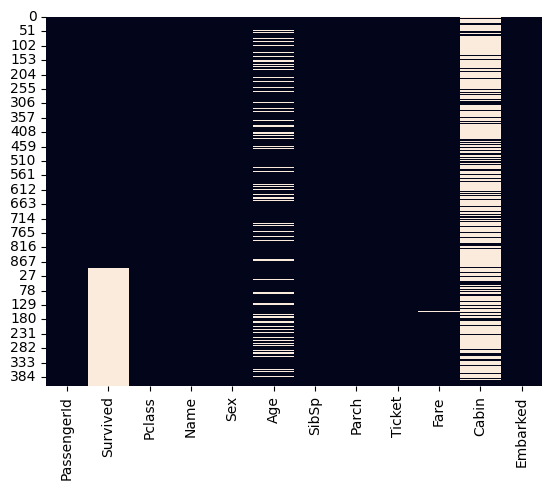

In [12]:
sns.heatmap(df.isnull(), cbar=False)

<p style="text-align: center;"><em>Feature Engineering</em></p>

In [13]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.',expand=True)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [14]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Dr','Col','Major','Sir','Don','Capt','Jonkheer'],'Mr')     

In [15]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))

In [16]:
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
df.loc[(df['Age'] > 0) & (df['Age'] <= 1), 'Age'] = 1

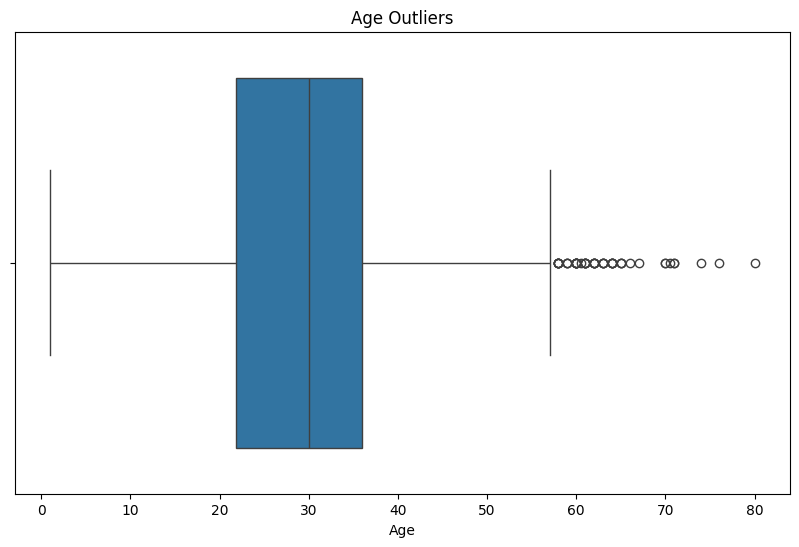

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Age Outliers')
plt.show()

In [19]:
df= df[df['Age'] <= 76]

In [20]:
df["Age"]=df["Age"]/70
df["Pclass"]=df["Pclass"]/4
df["Fare"]=df["Fare"]/515
df["Parch"]=df["Parch"]/10


In [21]:
idprotect = pd.DataFrame()
idprotect['PassengerId'] = test1['PassengerId']

In [22]:
df=df.drop(['PassengerId','Name','Ticket',"Cabin"],axis=1)

In [23]:
df=pd.get_dummies(df,drop_first=True)

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,0.75,0.314286,1,0.0,0.014078,True,False,True,False,True,False
1,1.0,0.25,0.542857,1,0.0,0.138414,False,False,False,False,False,True
2,1.0,0.75,0.371429,0,0.0,0.015388,False,False,True,True,False,False
3,1.0,0.25,0.500000,1,0.0,0.103107,False,False,True,False,False,True
4,0.0,0.75,0.500000,0,0.0,0.015631,True,False,True,False,True,False


<p style="text-align: center;"><em>Modelling</em></p>

In [25]:
train = df[df['Survived'].notna()]
test = df[df['Survived'].isna()]

In [26]:
test.shape

(418, 12)

In [27]:
x=train.drop('Survived',axis=1)
y=train[['Survived']]

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'XGBoost': XGBClassifier()
}

# Model performanslarını değerlendirme
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Sonuçları DataFrame'e dönüştürme
results_df = pd.DataFrame(results).set_index('Model')

# Sonuçları gösterme
print(results_df)

                       Accuracy  Precision    Recall  F1 Score
Model                                                         
Logistic Regression    0.865169   0.822785  0.866667  0.844156
Decision Tree          0.825843   0.797297  0.786667  0.791946
Random Forest          0.848315   0.824324  0.813333  0.818792
Gaussian Naive Bayes   0.820225   0.786667  0.786667  0.786667
Bernoulli Naive Bayes  0.820225   0.802817  0.760000  0.780822
XGBoost                0.848315   0.807692  0.840000  0.823529


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/54/3ndbm4sx1r91pc_9n7tk08d40000gn/T/ipykernel_22798/1669933673.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [30]:
del test["Survived"]

In [31]:
lr=LogisticRegression()

In [32]:
model=lr.fit(x,y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
tahmin=model.predict(test)

In [34]:
df2 = idprotect['PassengerId'].iloc[-418:].reset_index(drop=True)
df2 = pd.DataFrame(df2, columns=['PassengerId'])

In [35]:
sonuc=df2[["PassengerId"]]

In [36]:
sonuc.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [37]:
sonuc["Survived"]=tahmin

In [38]:
sonuc["Survived"]=sonuc["Survived"].astype("int64")

In [39]:
sonuc.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [40]:
sonuc.to_csv("submission for kaggle.csv",index=False)